In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
df = pd.read_csv("crop_production.csv")

**Exploratory Data Analysis**

In [117]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [118]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [119]:
df.shape

(246091, 7)

In [120]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [122]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [123]:
df["Production"].fillna(df["Production"].mean(),inplace=True)      #FILLING NULL VALUES WITH MEAN VALUE

In [124]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [125]:
df.duplicated().sum()

0

In [126]:
print(df["Season"].value_counts()) #UNIQUE VALUES IN ALL COLUMNS

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64


In [127]:
print(df["Crop"].unique())  #UNIQUE VALUES IN ALL COLUMNS

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


**Data Visulization**

**Finding Outliers with help of BoxPlot**

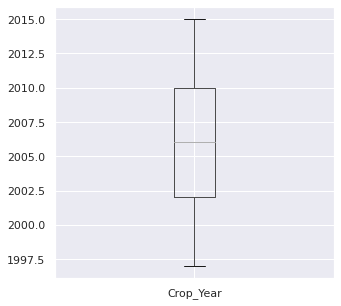

In [128]:
df[['Crop_Year']].boxplot()

In [129]:
p0=df.Crop_Year.min()             #Removing Outliers with IQR
p100=df.Crop_Year.max()
q1=df.Crop_Year.quantile(0.25)
q2=df.Crop_Year.quantile(0.5)
q3=df.Crop_Year.quantile(0.75)
iqr=q3-q1
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print(lc,uc)

df = df[df["Crop_Year"]>lc]
df = df[df["Crop_Year"]<uc]

1990.0 2022.0


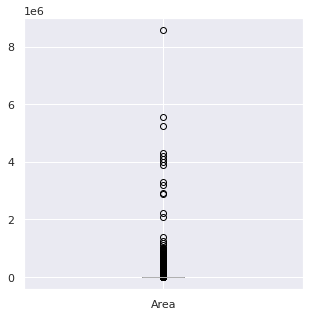

In [130]:
df[['Area']].boxplot()

In [131]:
p0=df.Area.min()             #Removing Outliers with IQR
p100=df.Area.max()
q1=df.Area.quantile(0.25)
q2=df.Area.quantile(0.5)
q3=df.Area.quantile(0.75)
iqr=q3-q1
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print(lc,uc)
df = df[df["Area"]>lc]
df = df[df["Area"]<uc]

-6388.0 10860.0


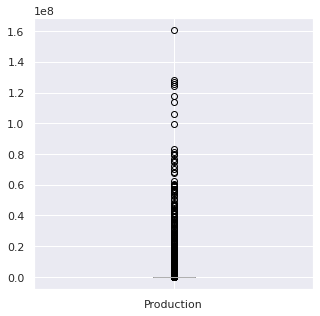

In [132]:
df[['Production']].boxplot()

In [135]:
p0=df.Production.min()             #Removing Outliers with IQR
p100=df.Production.max()
q1=df.Production.quantile(0.25)
q2=df.Production.quantile(0.5)
q3=df.Production.quantile(0.75)
iqr=q3-q1
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr
print(lc,uc)
df = df[df["Production"]>lc]
df = df[df["Production"]<uc]

-3429.5 5862.5


**Correlation Analysis**

In [133]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.046093,0.011351
Area,-0.046093,1.000000,0.044297
Production,0.011351,0.044297,1.000000


As Crop_Year increase Area considered decreases,but Prodution increase

As Area increase Production Increases


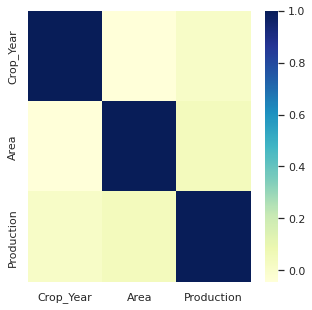

In [134]:
#Correlation plot
sns.heatmap(df.corr(),cmap="YlGnBu")

**Univariate Analysis**


Season



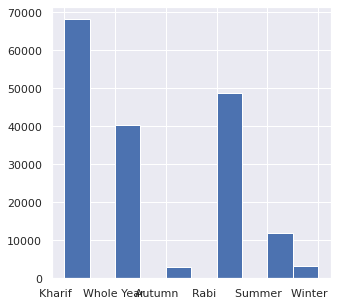

Area



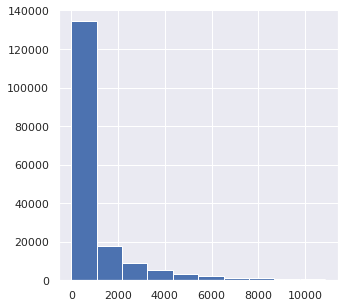

Production



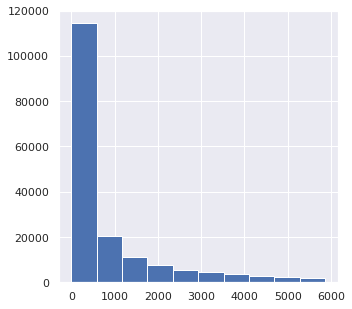

In [143]:
for col in df.columns:
  if col not in ["State_Name","District_Name","Crop","Crop_Year"]:
      df[col].hist()
      print(col)
      print()
      plt.show()

**Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


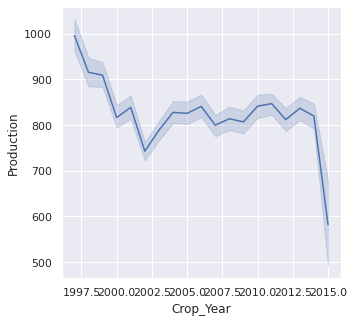

In [153]:
sns.lineplot(df["Crop_Year"],df["Production"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


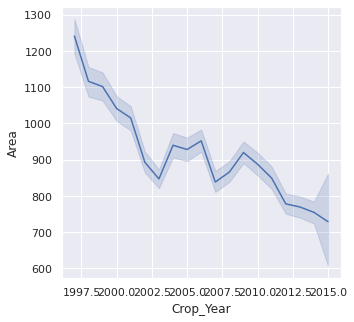

In [151]:
sns.lineplot(df["Crop_Year"],df["Area"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


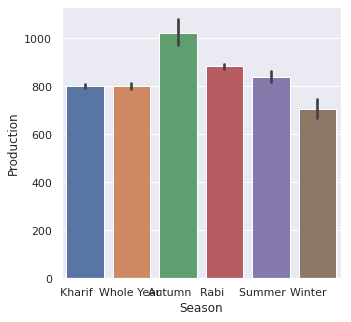

In [155]:
sns.barplot(df["Season"],df["Production"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Production_Per_Unit_Area')

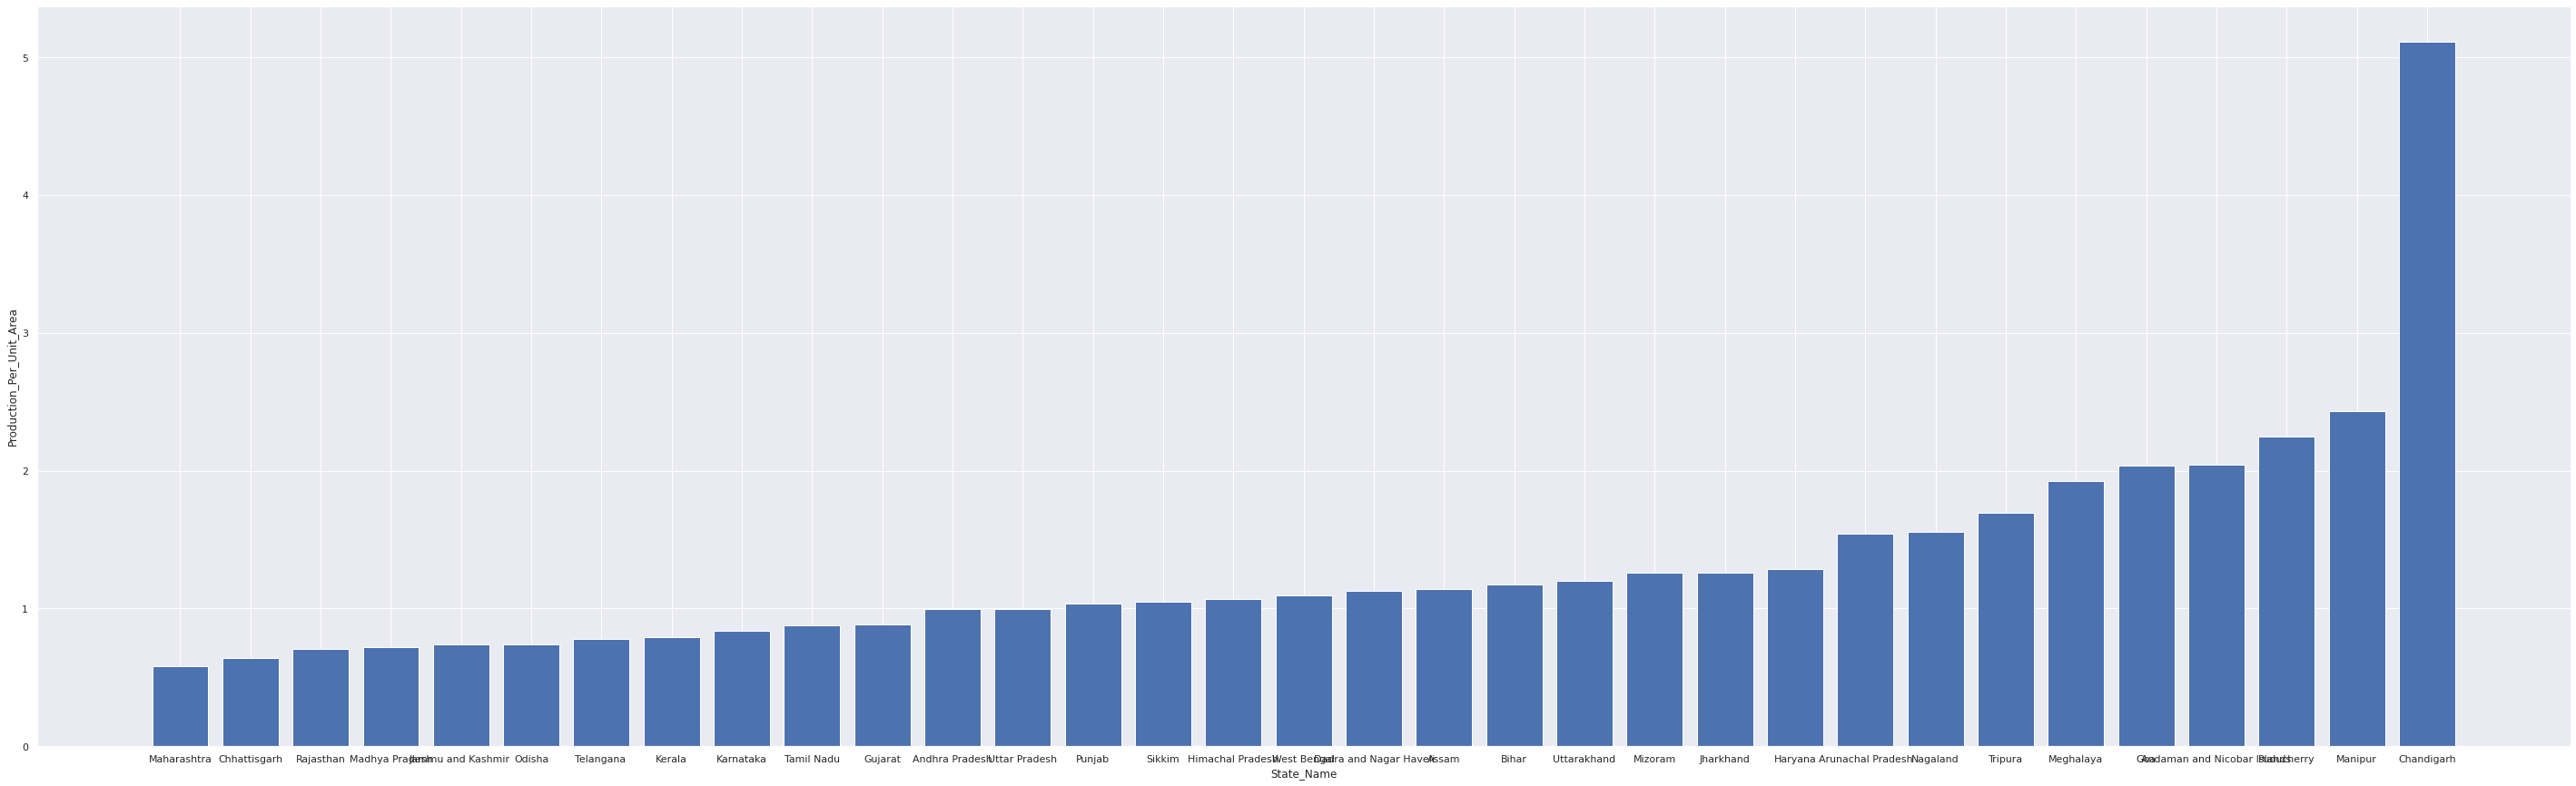

In [233]:
#PRODUCTIVITY OF DIFFERENT STATES 
temp = df.groupby('State_Name') ['Area','Production'].sum().reset_index() 
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area'] 
temp = temp.sort_values (by='Production_Per_Unit_Area') 
plt.bar(temp['State_Name'],temp['Production_Per_Unit_Area'])
plt.xlabel('State_Name')
plt.ylabel('Production_Per_Unit_Area')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


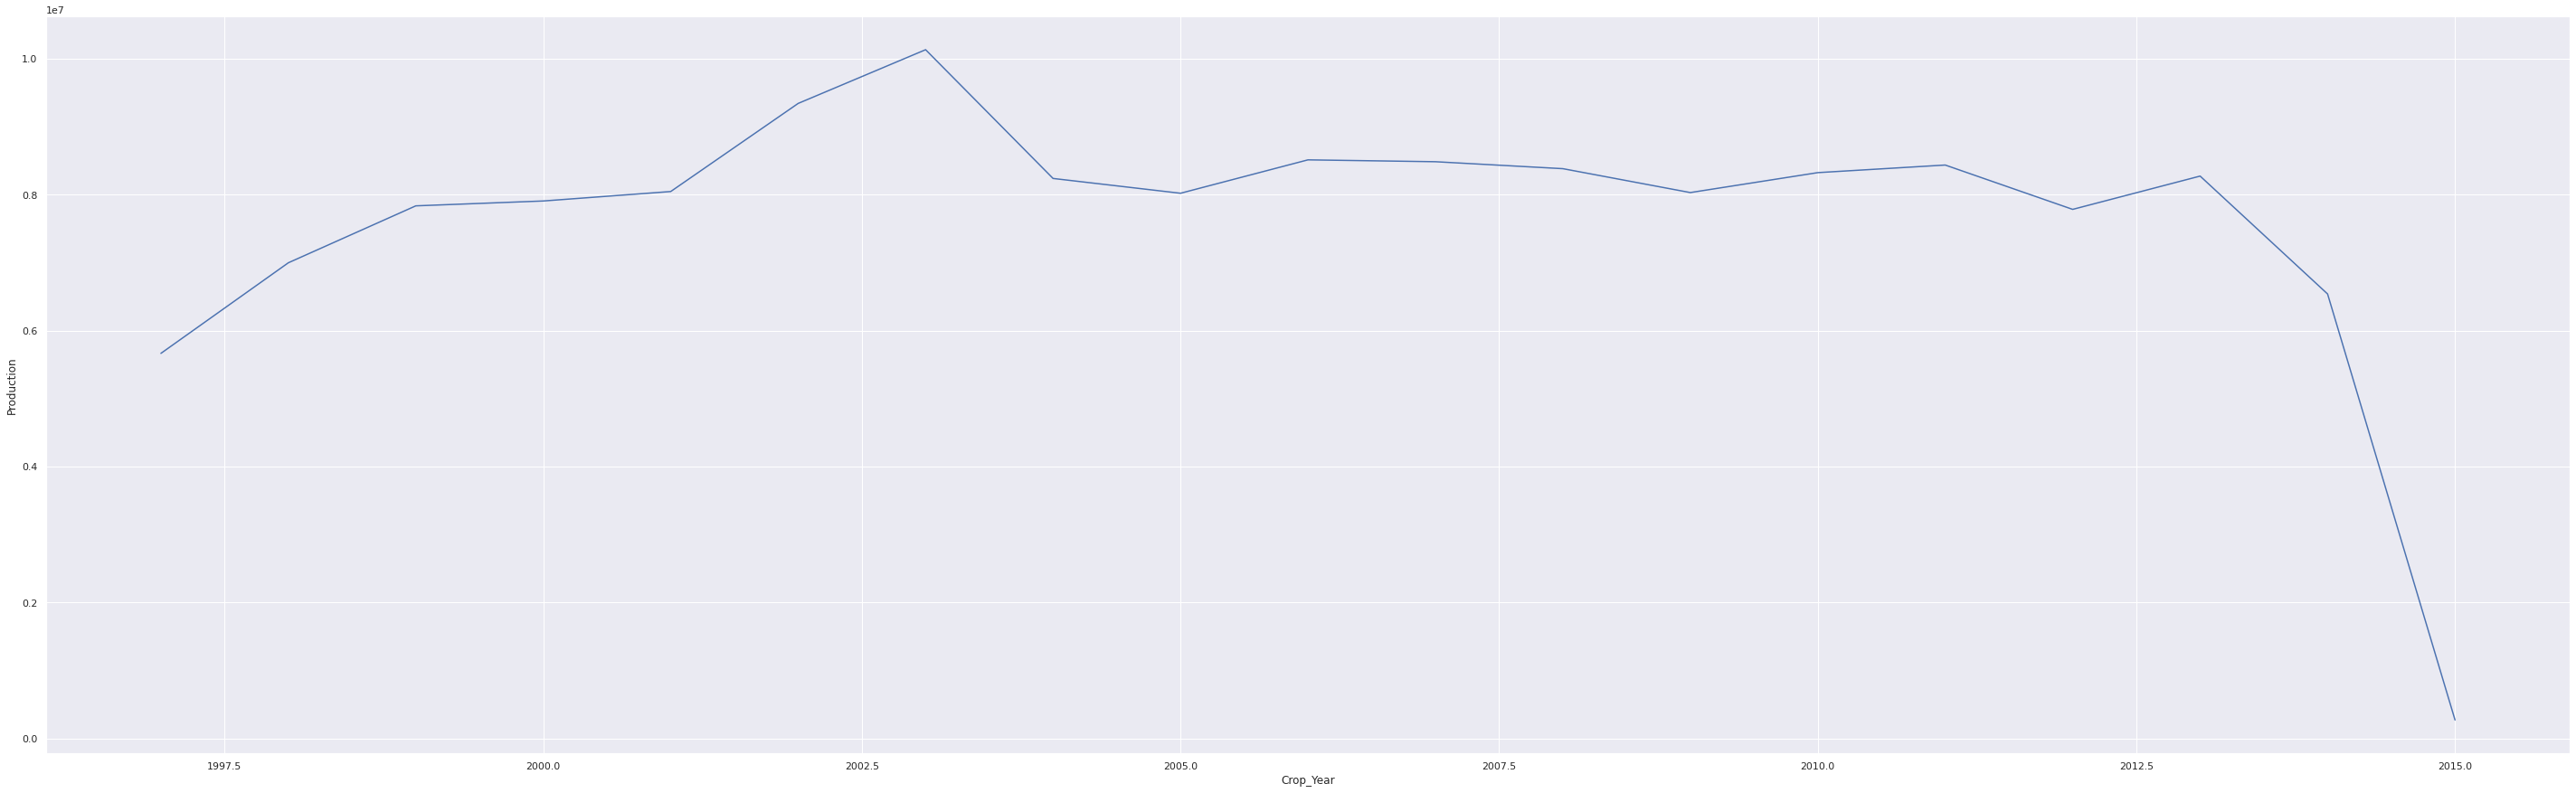

In [237]:
#OVERALL PRODUCTION THROUGH YEARS 
temp = df.groupby(by='Crop_Year')['Production'].sum().reset_index() 
sns.lineplot(temp['Crop_Year'], temp['Production'])

**Label Encoding And Modelling**

In [243]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['State_Name']= label_encoder.fit_transform(df['State_Name'])
df['District_Name']= label_encoder.fit_transform(df['District_Name'])
df['Crop']= label_encoder.fit_transform(df['Crop'])
df['Season']= label_encoder.fit_transform(df['Season'])

In [245]:
X = df.drop("Production", axis=1) 
y = df[["Production"]] 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(X_train, y_train) 
y_pred = regression.predict(X_test) 

**Metrics and Accuracy Measures**

In [246]:
from sklearn.metrics import mean_squared_error, r2_score 
mean_squared_error (y_test,y_pred) 
r2_score (y_test,y_pred)

0.4058783755679387

In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score 
cutoff = 0.7 
y_pred_classes=np.zeros_like(y_pred) 
y_pred_classes[y_pred > cutoff]=1 

y_test_classes=np.zeros_like(y_pred) 
y_test_classes[y_test > cutoff] = 1 
# CONFUSION MATRIX 
conf_matrix=confusion_matrix (y_test_classes, y_pred_classes) 
conf_matrix

array([[    0,  1306],
       [    0, 56499]])

In [258]:
TP = conf_matrix[1][1] 
TN = conf_matrix[0] [0] 
FP= conf_matrix[0][1] 
FN = conf_matrix[1][0] 
print('True Positives:', TP) 
print('True Negatives:', TN) 
print('False Positives:', FP) 
print('False Negatives:', FN) 

# calculate accuracy 
conf_accuracy = (float (TP+TN) / float (TP+ TN+ FP+ FN)) 

# calculate the sensitivity 
conf_sensitivity = (TP/ float (TP + FN)) 

# calculate the specificity 
conf_specificity = (TN/ float (TN+FP)) 

#calculate precision 
conf_precision = (TN / float (TN+FP)) 

# calculate recall 
recall = recall_score(y_test_classes, y_pred_classes) 

# calculate f_1 score 
conf_f1 = 2*((conf_precision*conf_sensitivity)/(conf_precision + conf_sensitivity)) 

print('-'*50) 
print(f'Accuracy: {round (conf_accuracy, 2)}') 
print(f'Sensitivity: {round (conf_sensitivity, 2)}') 
print(f'Specificity: {round(conf_specificity, 2)}') 
print(f'Precision: {round (conf_precision, 2)}') 
print('Recall: ',recall_score(y_test_classes, y_pred_classes)) 
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 56499
True Negatives: 0
False Positives: 1306
False Negatives: 0
--------------------------------------------------
Accuracy: 0.98
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.0
Recall:  1.0
f_1 Score: 0.0


**ROC CURVE**

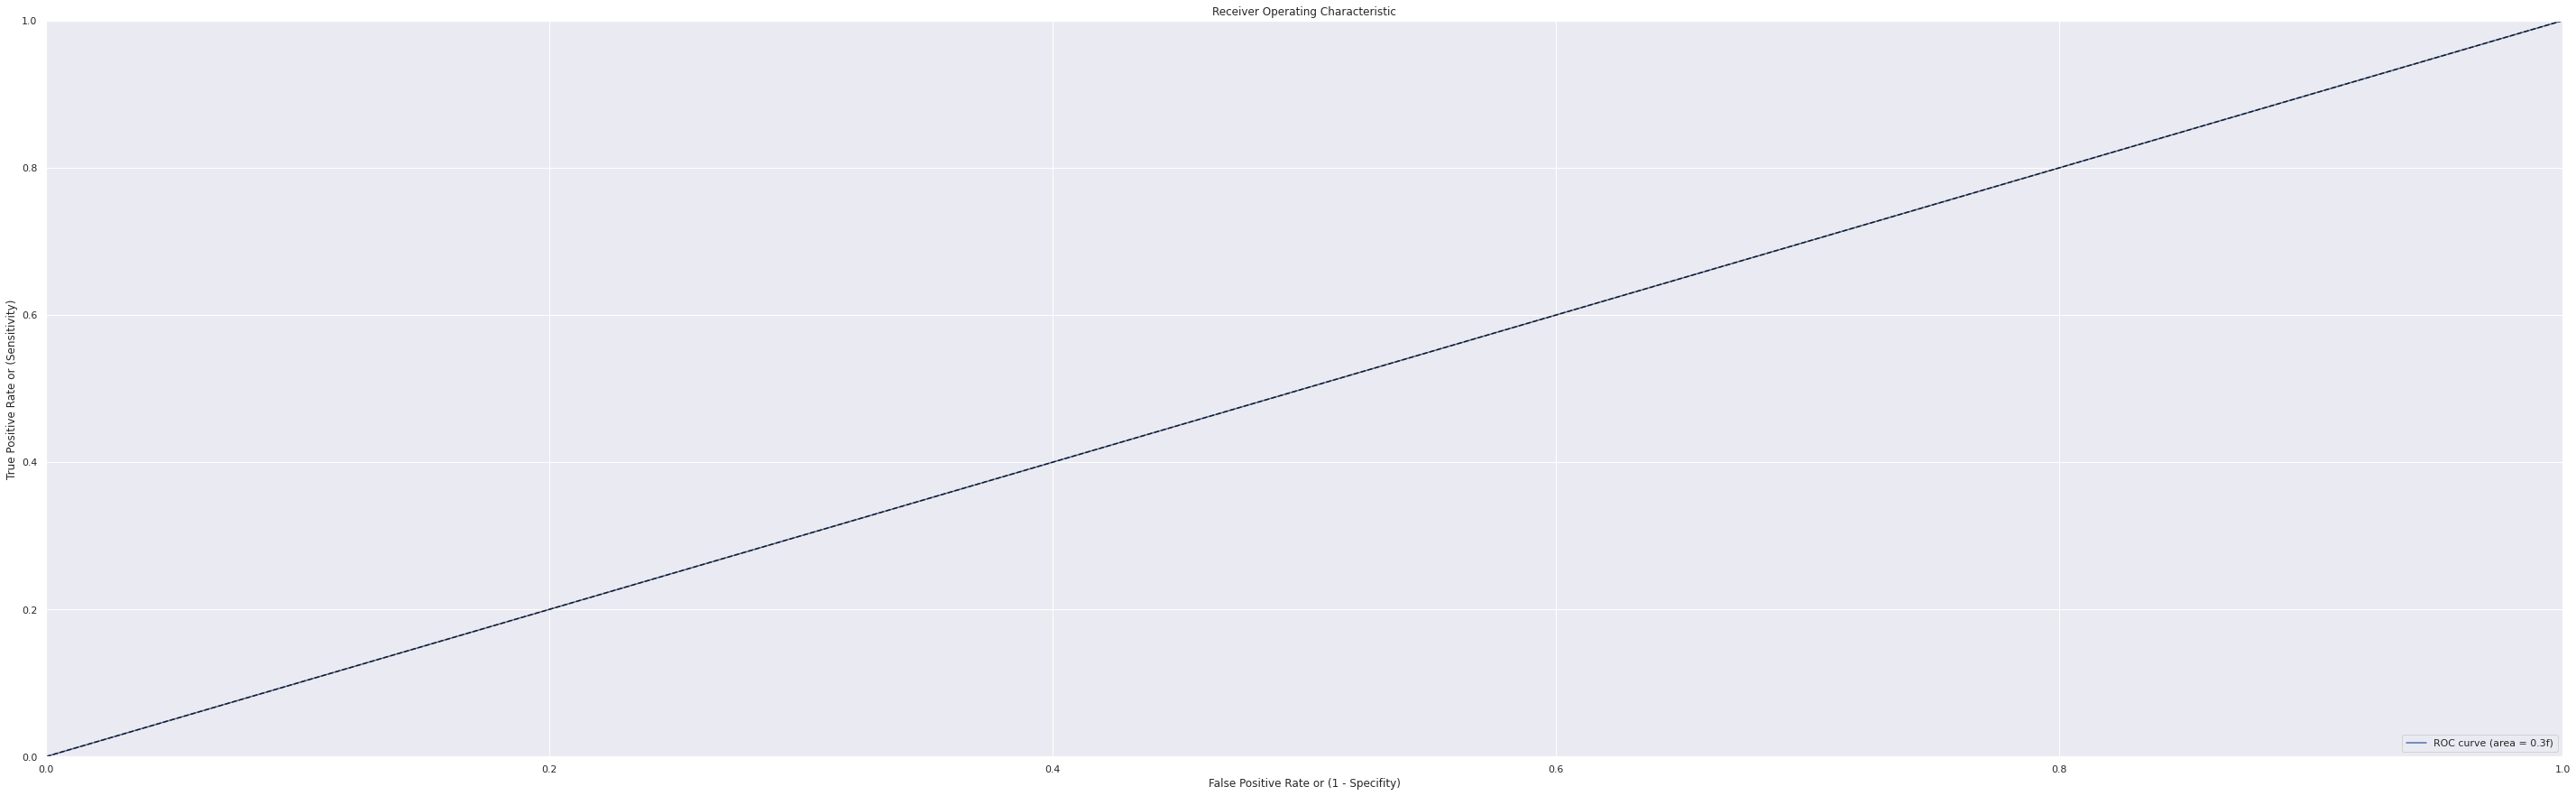

In [260]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
fpr,tpr,thresholds = roc_curve(y_test_classes, y_pred_classes) 
roc_auc = auc(fpr, tpr) 

plt.plot(fpr, tpr, label='ROC curve (area = 0.3f)'%roc_auc) 
plt.plot([0, 1], [0, 1], 'k--')      #random predictions curve
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate or (1 - Specifity)') 
plt.ylabel('True Positive Rate or (Sensitivity)') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right")

Linear: f1=0.989 auc=0.989


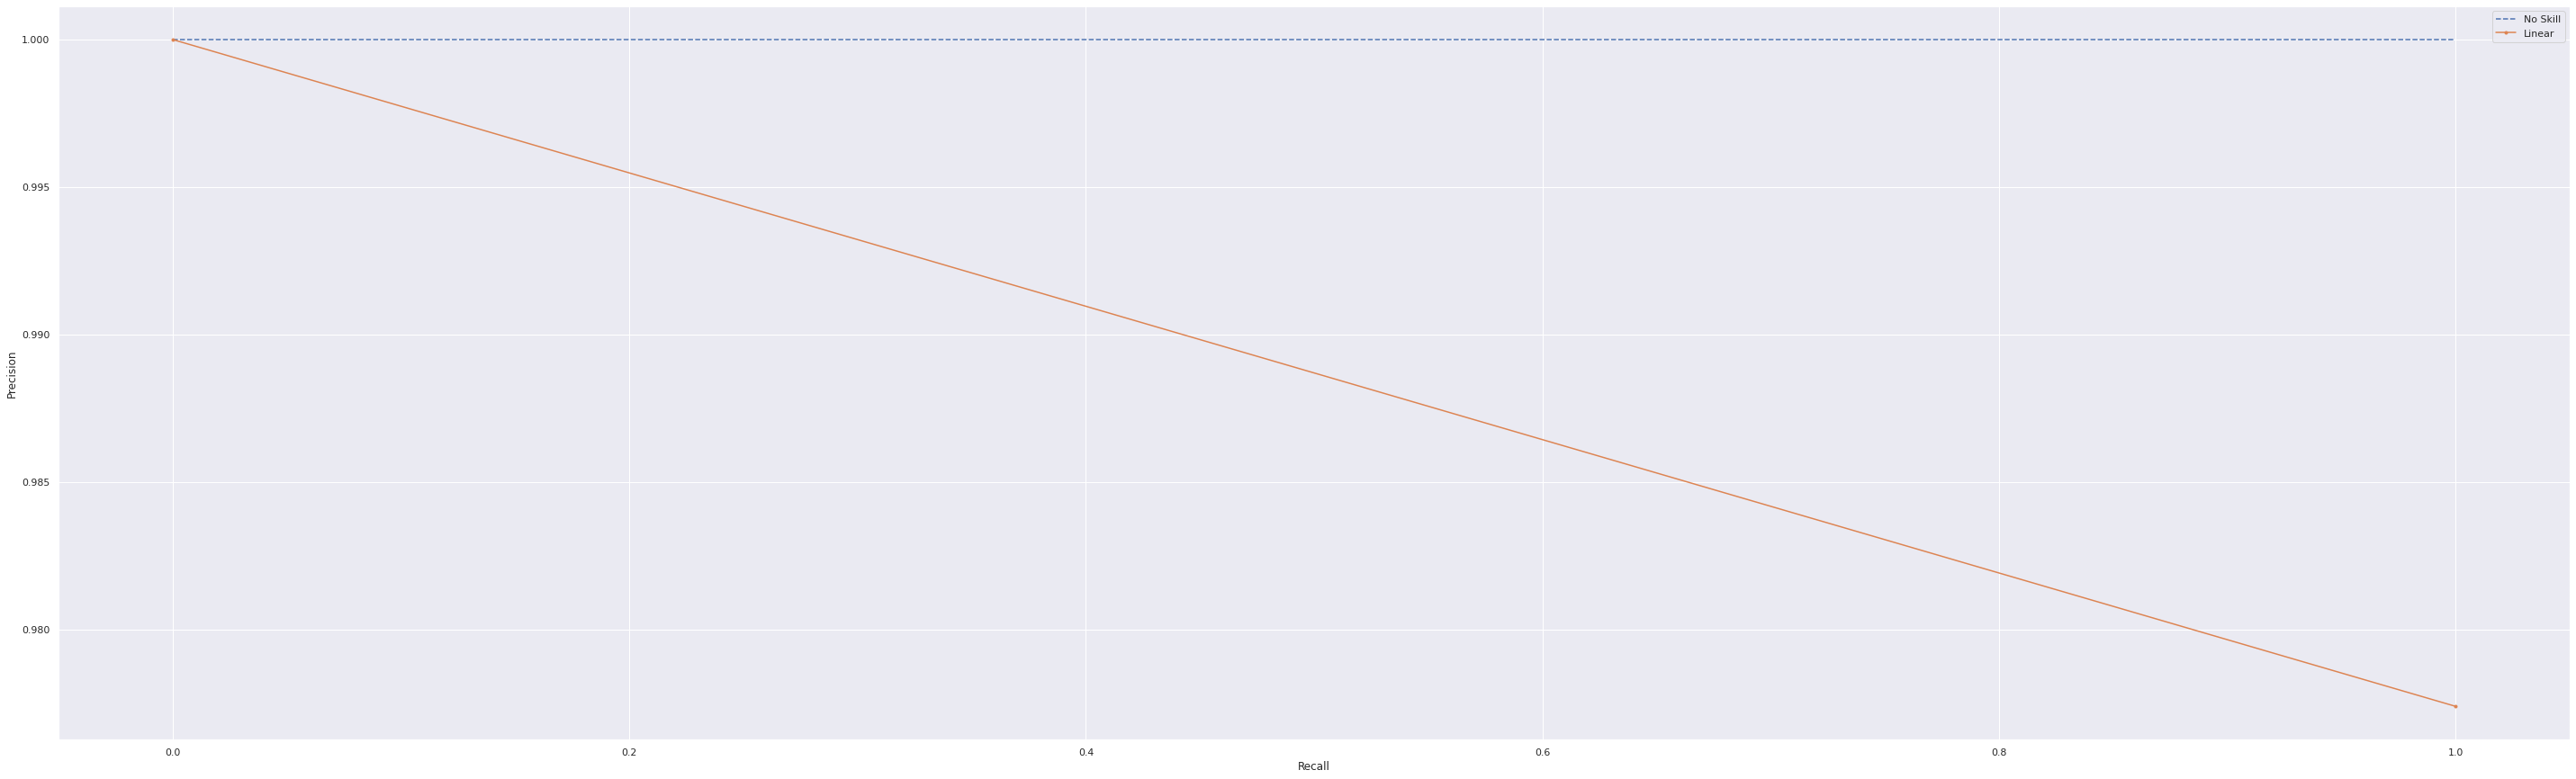

In [261]:
# precision-recall curve and f1 
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score 
from sklearn.metrics import auc 
from matplotlib import pyplot 
lr_precision, lr_recall, _= precision_recall_curve (y_test_classes, y_pred_classes) 
lr_f1, lr_auc = f1_score (y_test_classes, y_pred_classes), auc(lr_recall, lr_precision) 
#summarize scores 
print('Linear: f1=%.3f auc=%.3f'  % (lr_f1, lr_auc)) 
# plot the precision-recall curves 
no_skill= len(y_test[y_test==1]) / len(y_test) 
pyplot.plot([0, 1],[no_skill,no_skill],linestyle='--',label='No Skill') 
pyplot.plot(lr_recall, lr_precision, marker='.', label='Linear') 
#axis labels 
pyplot.xlabel('Recall') 
pyplot.ylabel('Precision') 
#show the legend 
pyplot.legend() 
#show the plot 
pyplot.show()